# Tarea 3: Agrupamiento de clientes utilizando K-Means
## Máster en IA aplicada a la Ciberseguridad, Módulo 2: Fundamentos de Machine Learning

Este notebook implementa un análisis de clustering utilizando el algoritmo K-means aplicado a un dataset bidimensional. Realizaremos:
1. Carga y visualización de datos
2. Aplicación del método del codo para encontrar el K óptimo
3. Aplicación del algoritmo K-means con el K óptimo
4. Visualización y análisis de los resultados

In [1]:
# Importar las bibliotecas necesarias
import numpy as np                  # Importar NumPy para operaciones numéricas y arrays
import matplotlib.pyplot as plt     # Importar Matplotlib para visualización de datos
from sklearn.cluster import KMeans  # Importar KMeans desde scikit-learn para clustering

## 1. Carga y procesamiento de datos

Primero cargamos los datos desde el archivo ARFF (Attribute-Relation File Format).

In [3]:
# Definir la ruta del archivo ARFF
ruta_archivo = "2d-3c-no123.arff"  # Establecer la ubicación del archivo de datos

# Iniciar la lectura del archivo ARFF y extracción de datos
print(f"Cargando datos desde {ruta_archivo}...")  # Imprimir mensaje informativo sobre la carga
datos = []                          # Crear lista vacía para almacenar los datos
with open(ruta_archivo, 'r') as archivo:  # Abrir el archivo en modo lectura
    leyendo_datos = False          # Inicializar bandera para identificar sección de datos
    for linea in archivo:          # Iterar por cada línea del archivo
        linea = linea.strip()      # Eliminar espacios en blanco al inicio y final de la línea
        # Ignorar líneas vacías o comentarios
        if not linea or linea.startswith('%'):  # Comprobar si la línea está vacía o es comentario
            continue               # Saltar a la siguiente iteración si es vacía o comentario
        # Identificar cuando comienzan los datos
        if '@DATA' in linea.upper():  # Comprobar si se ha llegado a la sección de datos
            leyendo_datos = True   # Activar bandera de lectura de datos
            continue               # Continuar con la siguiente línea
        # Leer datos cuando la bandera está activa
        if leyendo_datos and ',' in linea:  # Verificar si estamos en la sección de datos y hay comas
            valores = linea.split(',')  # Dividir la línea por comas
            if len(valores) >= 3:    # Comprobar si hay al menos 3 valores (2 características y 1 clase)
                # Extraer valores numéricos de las dos primeras columnas
                valores_numericos = [float(valores[0]), float(valores[1])]
                datos.append(valores_numericos)  # Añadir los valores a la lista de datos

# Convertir lista de datos a array NumPy para procesamiento
datos = np.array(datos)  # Transformar lista en array NumPy
print(f"Datos cargados: {len(datos)} instancias con {datos.shape[1]} características")  # Mostrar información de los datos

Cargando datos desde 2d-3c-no123.arff...
Datos cargados: 715 instancias con 2 características


## 2. Visualización de los datos originales

Visualizamos los datos en un gráfico de dispersión para obtener una primera impresión.

Visualizando datos originales...


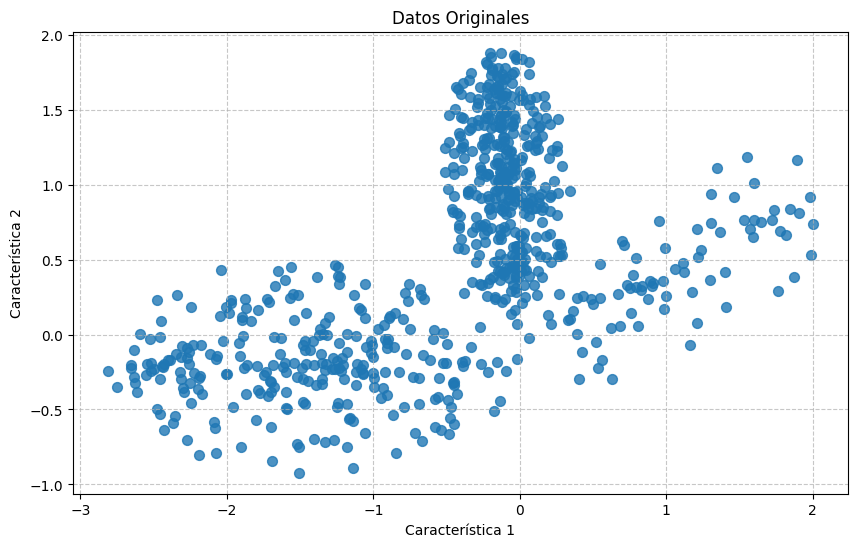

In [4]:
# Visualizar los datos originales para exploración inicial
print("Visualizando datos originales...")  # Informar sobre la visualización
plt.figure(figsize=(10, 6))  # Crear figura con tamaño específico
plt.scatter(datos[:, 0], datos[:, 1], s=50, alpha=0.8)  # Crear gráfico de dispersión con los datos
plt.title("Datos Originales")  # Añadir título al gráfico
plt.xlabel('Característica 1')  # Etiquetar eje X
plt.ylabel('Característica 2')  # Etiquetar eje Y
plt.grid(True, linestyle='--', alpha=0.7)  # Añadir cuadrícula para mejor visualización
plt.show()  # Mostrar el gráfico

## 3. Método del codo para determinar K óptimo

Aplicamos el método del codo para encontrar el número óptimo de clusters (K).

Aplicando método del codo para encontrar K óptimo...


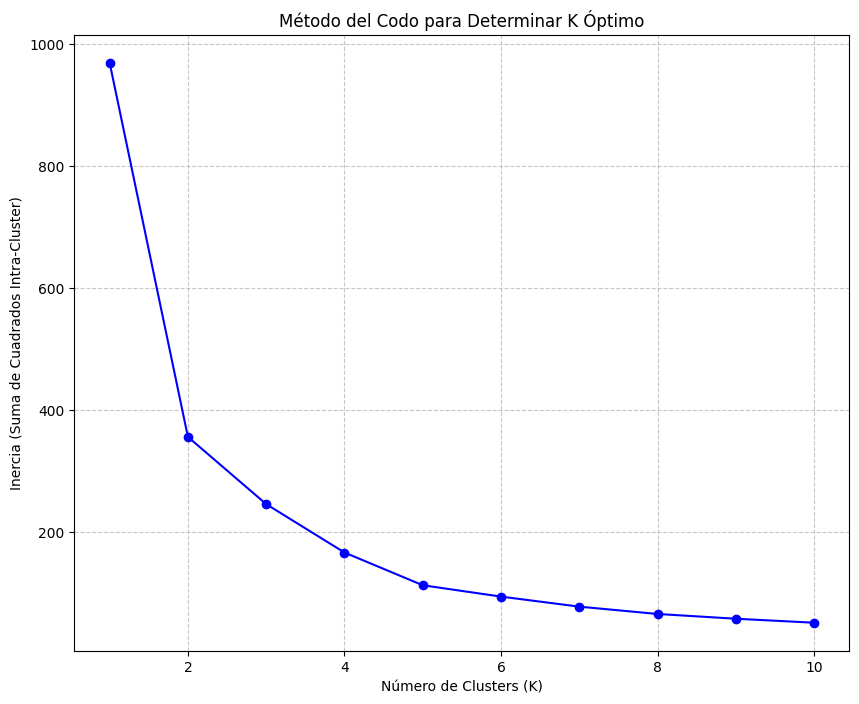

In [5]:
# Aplicar método del codo para determinar el número óptimo de clusters
print("Aplicando método del codo para encontrar K óptimo...")  # Informar sobre el proceso
max_k = 10  # Establecer número máximo de clusters a evaluar
valores_k = range(1, max_k + 1)  # Crear rango de valores K a probar
inercias = []  # Inicializar lista para almacenar valores de inercia

# Calcular inercia para cada valor de K
for k in valores_k:  # Iterar por cada valor de K
    # Crear modelo KMeans con el K actual
    modelo = KMeans(n_clusters=k, random_state=42, n_init=10)  # Inicializar modelo KMeans
    modelo.fit(datos)  # Entrenar modelo con los datos
    # Almacenar la inercia (suma de distancias al cuadrado)
    inercias.append(modelo.inertia_)  # Guardar valor de inercia del modelo

# Visualizar resultados del método del codo
plt.figure(figsize=(10, 8))  # Crear nueva figura para el gráfico
plt.plot(valores_k, inercias, 'bo-')  # Dibujar gráfico de línea con puntos azules
plt.title('Método del Codo para Determinar K Óptimo')  # Añadir título descriptivo
plt.xlabel('Número de Clusters (K)')  # Etiquetar eje X
plt.ylabel('Inercia (Suma de Cuadrados Intra-Cluster)')  # Etiquetar eje Y
plt.grid(True, linestyle='--', alpha=0.7)  # Añadir cuadrícula para mejor lectura
plt.show()  # Mostrar el gráfico del método del codo

## 4. Aplicación de K-means con K óptimo

Basado en el gráfico del método del codo, elegimos K=3 como el número óptimo de clusters y aplicamos el algoritmo K-means.

In [6]:
# Determinar valor óptimo de K basado en el gráfico
k_optimo = 3  # Establecer K óptimo (basado en observación visual del gráfico)
print(f"Basado en el gráfico del codo, el valor óptimo de K parece ser {k_optimo}")  # Informar sobre el valor elegido

# Aplicar algoritmo K-means con el valor óptimo de K
print(f"Aplicando K-means con K={k_optimo}...")  # Informar sobre el proceso
modelo_final = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)  # Crear modelo final
etiquetas = modelo_final.fit_predict(datos)  # Entrenar modelo y obtener etiquetas
centroides = modelo_final.cluster_centers_  # Obtener coordenadas de los centroides

Basado en el gráfico del codo, el valor óptimo de K parece ser 3
Aplicando K-means con K=3...


## 5. Visualización de resultados

Visualizamos los resultados del clustering, mostrando cada cluster con un color diferente y los centroides.

Visualizando resultados del clustering...


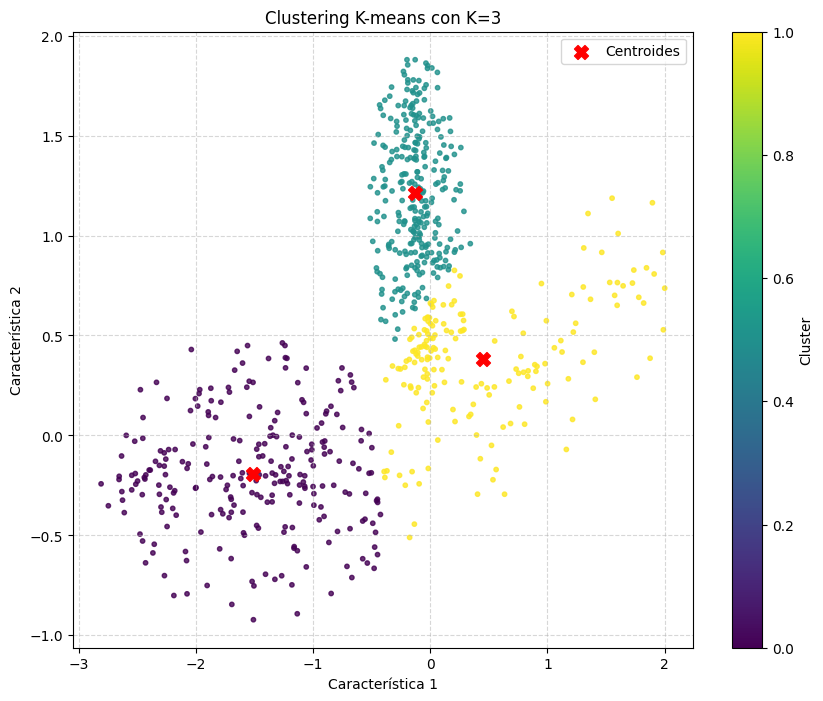

In [7]:
# Visualizar resultados del clustering
print("Visualizando resultados del clustering...")  # Informar sobre la visualización
plt.figure(figsize=(10, 8))  # Crear figura para el gráfico final
# Dibujar puntos coloreados según su cluster
plt.scatter(datos[:, 0], datos[:, 1], c=etiquetas, cmap='viridis', s=10, alpha=0.8)
# Dibujar centroides como X rojas
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='X', s=100, label='Centroides')
plt.title(f"Clustering K-means con K={k_optimo}")  # Añadir título
plt.xlabel('Característica 1')  # Etiquetar eje X
plt.ylabel('Característica 2')  # Etiquetar eje Y
plt.grid(True, linestyle='--', alpha=0.5)  # Añadir cuadrícula
plt.colorbar(label='Cluster')  # Añadir barra de color
plt.legend()  # Mostrar leyenda
plt.show()  # Mostrar gráfico final

## 6. Análisis de resultados

Analizamos los resultados obtenidos, mostrando información sobre los centroides y la distribución de instancias por cluster.

In [8]:
# Mostrar información sobre los centroides
print("\nCentroides de los clusters:")  # Título de la sección
for i, centroide in enumerate(centroides):  # Iterar por cada centroide
    print(f"Cluster {i}: {centroide}")  # Imprimir coordenadas de cada centroide

# Analizar distribución de instancias por cluster
conteo_clusters = np.bincount(etiquetas)  # Contar número de instancias en cada cluster
print("\nDistribución de instancias por cluster:")  # Título de la sección
for i, conteo in enumerate(conteo_clusters):  # Iterar por cada cluster
    # Calcular y mostrar estadísticas de cada cluster
    print(f"Cluster {i}: {conteo} instancias ({conteo/len(datos)*100:.2f}%)")

print("\nAnálisis de clustering completado.")  # Mensaje final de finalización


Centroides de los clusters:
Cluster 0: [-1.51332746 -0.19097806]
Cluster 1: [-0.12750861  1.2130758 ]
Cluster 2: [0.44888963 0.38488812]

Distribución de instancias por cluster:
Cluster 0: 251 instancias (35.10%)
Cluster 1: 289 instancias (40.42%)
Cluster 2: 175 instancias (24.48%)

Análisis de clustering completado.


## Conclusiones

En este ejercicio hemos aplicado el algoritmo K-means para agrupar datos bidimensionales. A través del método del codo, determinamos que K=3 es el número óptimo de clusters para este dataset.

Los resultados muestran que los datos se dividen claramente en tres grupos, lo que coincide con la información visual que obtuvimos inicialmente. El análisis proporciona información sobre la distribución de instancias en cada cluster y las coordenadas de los centroides.

Este tipo de análisis de clustering puede utilizarse en contextos como segmentación de clientes, donde es importante identificar grupos naturales para adaptar estrategias comerciales específicas a cada segmento.